# COMP0142

# Assignment 2: Classification with Naive Bayes & Logistic Regression

## Introduction

In this assignment, we will implement multiclass classification using Logistic Regression and Naive Bayes via the Scikit-learn library.

In Part A of this assignment, we are going to implement Logistic Regression. First, we are going to examine how data scaling affects the performance of the classifier: We will produce a classification report and plot a confusion matrix. We are then going to use cross validation to more reliably compare the performance of the models.

In Part B of this assignment, we are going to implement multiclass and Bernoulli Naive Bayes. We are going to perform feature selection and analyse the performance of the model. Finally, we are also going to look at decision boundaries.

We are going to work with two datasets:
- The 'Gene expression cancer RNA-Seq' dataset 
- The 'Zoo' dataset.

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- You will have to submit the completed notebook in the Jupyter notebook format: `.ipynb`.
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  ````
  ##########################################################
  # TO_DO
  
  #[your code here]
  ````
   
   And which end:
   
  ````
  # /TO_DO
  ##########################################################
  ````


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`


- Some of the code you are asked to write may generate **warning messages**. Some boilerplate code is included to suppress these warnings, but you may wish to comment it out while you are working so that you don't missing useful information.

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in their respective documentation. The most relevant package for this assignment is Scikit-learn:

https://scikit-learn.org/stable/

In [1]:
#PLEASE DO NOT CHANGE THIS CELL

# Standard python libraries for data and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
import seaborn as sns

# SciKit Learn python ML Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

# Import error metric
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import library for handling warnings
import warnings

In [2]:
#PLEASE DO NOT CHANGE THIS CELL

# Functions to use
# Decision boundary plotting 
def plot_predictions(X, y, clf):
    h = .02  # step size in the mesh
 
    # create a mesh to plot in
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize=(8,6))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    pylab.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(list(X.head(0))[0])
    plt.ylabel(list(X.head(0))[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(np.arange(min(X.iloc[:, 0]), max(X.iloc[:, 0])+1, 1.0))
    plt.yticks(np.arange(min(X.iloc[:, 1]), max(X.iloc[:, 1])+1, 1.0))
    plt.title(clf)

    plt.show
    
# confusion matrix plotting
def plot_conf_matrix(conf_matrix):
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')    
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

# Part A: Logistic Regression [50 marks]

## Gene expression dataset
This dataset contains gene expression data from patients diagnosed with one of tumor types: BRCA, KIRC, COAD, LUAD and PRAD. Each feature corresponds to a different gene. 

Dataset location: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

Number of instances: 801

Number of features: 20531   

All of these parameters are real-valued continuous. To reduce computation time, we are going to work with the first 200 features.

## Load dataset
Please save the `data.csv` and `labels.csv` files included in the assignment zip file, which contain this data, and change the paths below to the paths leading to the location of your downloaded files. You may want to use os.chdir to change directory. 

In [3]:
# PLEASE CHANGE THE FILE PATHS AS NEEDED

file_path_data = "data.csv"
file_path_labels = "labels.csv"

In [4]:
#PLEASE DO NOT CHANGE THIS CELL

# read the file with pandas.read_csv
X = pd.read_csv(file_path_data, usecols=[*range(1, 201)])
y = pd.read_csv(file_path_labels, usecols=[1]).values.ravel()

label_list = ["BRCA", "KIRC", "COAD", "LUAD", "PRAD"]

## Data analysis and pre-processing 
Below, we will generate histograms of the first 12 'Gene expression cancer RNA-Seq' dataset features.

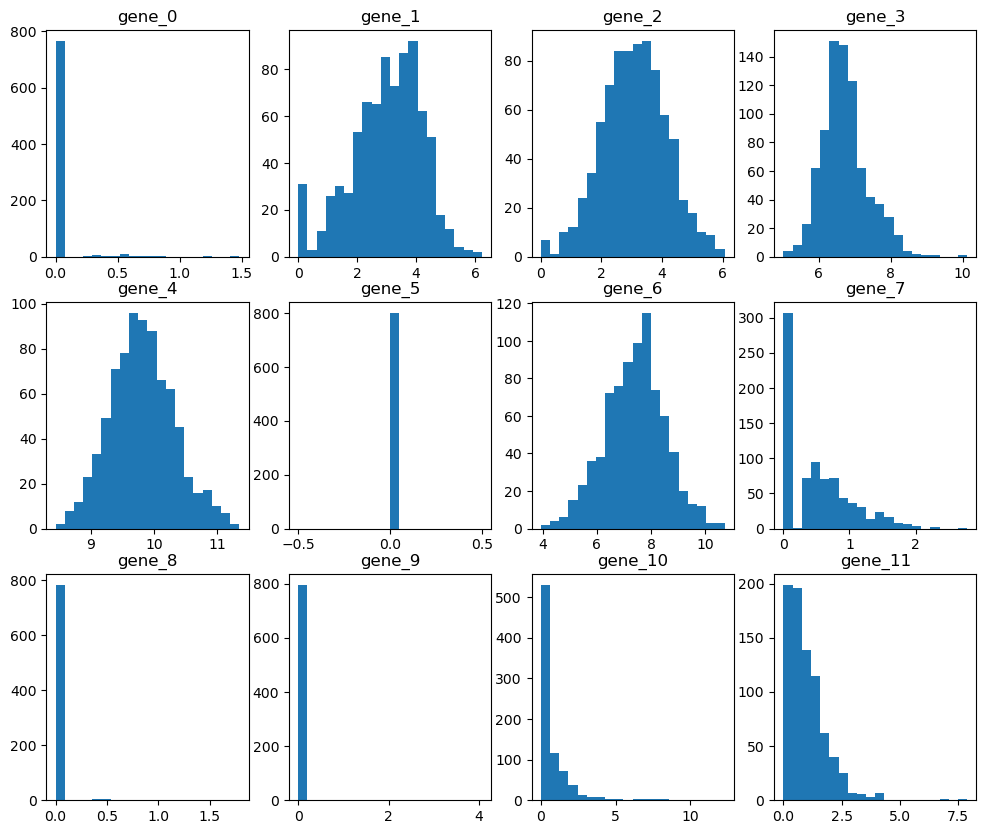

In [5]:
#PLEASE DO NOT CHANGE THIS CELL

figs, axs = plt.subplots(3, 4, figsize=(12, 10))
axs = axs.ravel()

for counter in range(12):
    col = X.columns[counter]
    axs[counter].hist(X[col], bins=20)
    axs[counter].set_title(col)

Regularisation makes the classifier dependent on the scale of the features. 

We are going to scale the features and compare the performance of Logistic Regression on unscaled and scaled dataset. 

### _Question 1 [10 marks]_ 

### _a) [3 marks]_ 
- Use `StandardScaler()` to scale the data. Save the result to a new variable (do not overwrite X).

In [6]:
#######################################################
# TO_DO
#[your code here]

scaled_X = StandardScaler().fit_transform(X)

#/TO_DO
#######################################################

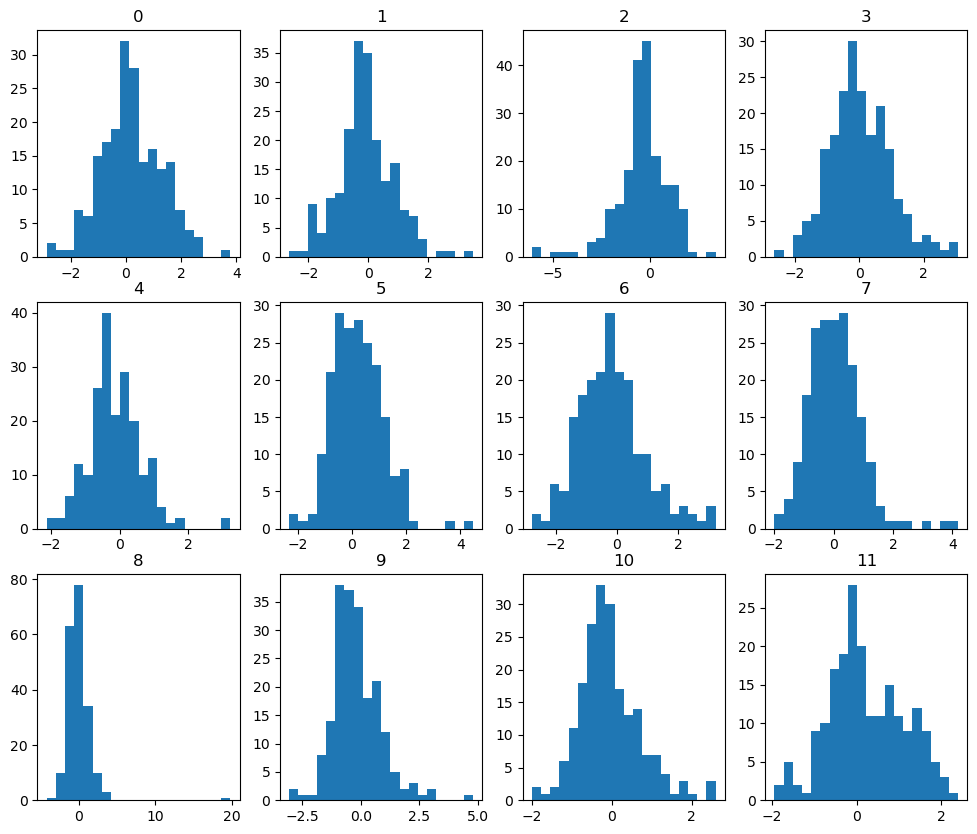

In [7]:
#PLEASE DO NOT CHANGE THIS CELL

figs, axs = plt.subplots(3, 4, figsize=(12, 10))
axs = axs.ravel()

for counter in range(12):
    axs[counter].hist(scaled_X[counter], bins=20)
    axs[counter].set_title(counter)

### _b) [3 marks]_
-  Explain how the `StandardScaler()` function changes the data, (in particular its mean and variance)? (**Hint:** You can re-run the code from the section **Data analysis and pre-processing** in order to visualise scaled values.)

In [8]:
# [INSERT YOUR ANSWER HERE]
The StandardScaler functions changes the data by removing its mean and by scaling to unit variance
The mean and variance is calculated for each feature(column), and then each datapoint is recalculated as (x-m)/v, where m 
    is the column's mean and v the column's variance 
The data for each feature in scaled_X is now centered around 0, with unit variance
# 

SyntaxError: invalid syntax (2135378553.py, line 2)

### _c) [4 marks]_
- `LogisticRegression()` uses $\ell_2$ regularisation as default. Briefly explain the effect of such a regulariser. Furthermore, briefly explain why data scaling might be a useful pre-processing step before the application of such a regulariser.

In [9]:
# [INSERT YOUR ANSWER HERE]
Regularisation adds a new term to the loss function, that depends on the weights.
Therefore by using regularisation, during gradient descent, the original loss function and the magnitude of the weight will be 
    reduced.
This helps preventing overfitting and therefore the model generalises better, instead of just recalling the training set.

In order to see why data scaling helps the l2 regulariser, we first need to look at the loss function for the regression 
    with l2 regularisation:
        sum_i((yi-sum_j(xij*wj))^2) + lambda*sum_j((wj)^2)
    and without l2 regularisaton
        sum_i((yi-sum_j(xij*wj))^2)
Data scaling improves the performance of regularisers, because it centers data around 0 and scales them down to unit variance.
If the values of the dataset were for example too big, then the values of w would have to be very small (remember we want the 
    sum of products between x and w to be close to y, who are small values representing the class), and therefore during gradient
    descent, in order to best minimise the loss function, the model will try to minimise in the best way possible therefore modifying
    w as according to where the biggest influence on the loss, that being in the first part of the loss function, basically almost
    ignoring the regularisation term
The converse is also possible, if the values of the dataset are too small (subunitary), then the values of w will be very big,
    and the gradient descent will try to minimise the regularisation term by making them smaller and smaller, almost ignoring
    the error caused by misclassification
    
# 

SyntaxError: invalid syntax (1967665749.py, line 2)

### Classifier performance analysis

A Confusion Matrix is a table used for the evaluation of classification models. The x axis represents predicted labels while the y axis represents actual labels. Each cell indicates the sum of instances assigned to a particular combination of these labels. Diagonal values represents correctly classified instances.  

### _Question 2 [20 marks]_

### _a) [5 marks]_ 
- Create training and testing datasets for the unscaled and scaled data (set `random_state=42` and `train_size=0.7` when making your split).

In [10]:
lg = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter = 5000)
lg_scaled = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter = 5000)

#######################################################
# TO_DO
#[your code here]

y_numerical = [label_list.index(e) for e in y]
X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, train_size=0.7, random_state=42)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_X, y_numerical, train_size=0.7, random_state=42)

#/TO_DO
#######################################################

### _b) [5 marks]_ 
- Fit `LogisticRegression()` to the unscaled and scaled data.

In [11]:
with warnings.catch_warnings():
    
    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")
    
    #[your code here]
    weights = lg.fit(X_train, y_train)
    scaled_weights = lg_scaled.fit(X_scaled_train, y_scaled_train)

    #/TO_DO
    #######################################################

### _c) [5 marks]_ 
- Plot confusion matrices for the scaled and unscaled data using Scikit-learn `confusion_matrix()` and the `plot_conf_matrix()` function defined for you at the beginning of the notebook.

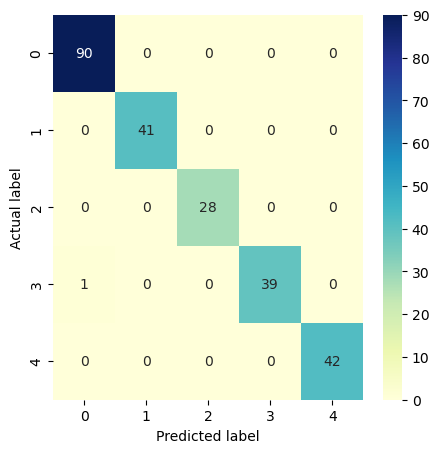

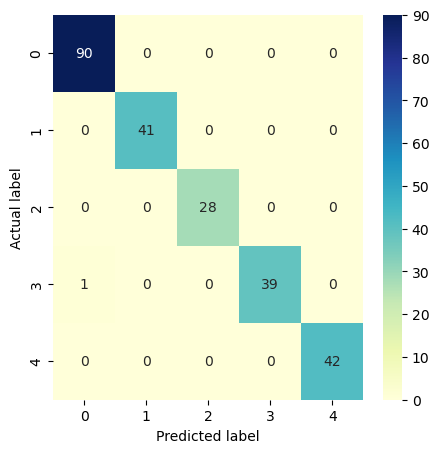

In [12]:
#######################################################
# TO_DO
#[your code here]
calculated_y  = weights.predict(X_test)
plot_conf_matrix(confusion_matrix(y_test,calculated_y));
calculated_scaled_y = scaled_weights.predict(X_scaled_test)
plot_conf_matrix(confusion_matrix(y_scaled_test,calculated_scaled_y));

#/TO_DO
#######################################################

### _d) [5 marks]_ 
- Print a classification report using scikit-learn `classification_report()` function. You can use `target_names = label_list` to include labels.

In [13]:
with warnings.catch_warnings():
    
    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")
    
    #[your code here]
    print ("Unscaled data")
    print (classification_report(y_test, calculated_y, target_names=label_list))
    print ("Scaled data")
    print (classification_report(y_scaled_test, calculated_scaled_y, target_names=label_list))

    #/TO_DO
    #######################################################

Unscaled data
              precision    recall  f1-score   support

        BRCA       0.99      1.00      0.99        90
        KIRC       1.00      1.00      1.00        41
        COAD       1.00      1.00      1.00        28
        LUAD       1.00      0.97      0.99        40
        PRAD       1.00      1.00      1.00        42

    accuracy                           1.00       241
   macro avg       1.00      0.99      1.00       241
weighted avg       1.00      1.00      1.00       241

Scaled data
              precision    recall  f1-score   support

        BRCA       0.99      1.00      0.99        90
        KIRC       1.00      1.00      1.00        41
        COAD       1.00      1.00      1.00        28
        LUAD       1.00      0.97      0.99        40
        PRAD       1.00      1.00      1.00        42

    accuracy                           1.00       241
   macro avg       1.00      0.99      1.00       241
weighted avg       1.00      1.00      1.00       2

### Cross validation
In Scikit-learn, `StratifiedKFold()` splits the data into $k$ different folds.  
`cross_val_score()` then uses these folds to run the classifier multiple times and collect multiple accuracy scores.   

### _Question 3 [20 marks]_

### _a) [5 marks]_ 
- Split data using `StratifiedKFold()`. Set `n_splits = 10`, `shuffle = True`, and `random_state=42`.

In [14]:
with warnings.catch_warnings():
    
    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")
    
    #[your code here]
    folding = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    #/TO_DO
    ########################################################

### _b) [5 marks]_ 
- Calculate cross validation scores using `cross_val_score()`. Call the variables storing these scores `lg_scores` and `lg_scaled_scores` (for consistency with plotting done for you in the subsequent section). (**Hint:** `cv` is equal to the output of `StratifiedKFold()`.)

In [15]:
with warnings.catch_warnings():
    
    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")
    
    #[your code here]
    
    lg_scores = cross_val_score(lg, X, y, cv=folding)
    lg_scaled_scores = cross_val_score(lg_scaled, scaled_X, y, cv=folding)
    
    #/TO_DO
    ########################################################

### _c) [5 marks]_ 
- Calculate and print the mean of the scores.

In [16]:
with warnings.catch_warnings():
    
    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")
    
    #[your code here]
    print(lg_scores.mean());
    print(lg_scaled_scores.mean());
    
    #/TO_DO
    ########################################################

0.9950000000000001
0.99375


### _d) [5 marks]_ 
- Unlike vanilla `KFold()`, `StratifiedKFold()` aims to preserve the proportion of examples belonging to each class in each split. Does `StratifiedKFold()` make each data split balanced if the whole dataset is not balanced?

In [17]:
# [INSERT YOUR ANSWER HERE]

# No, the class proportion is (approximately) preserved, so each split will be
# (approximately) as unbalanced as the whole dataset.

We can visualise the scores using a box plot. It highlights the lower and upper quartiles, and "whiskers" showing the extent of the scores.  

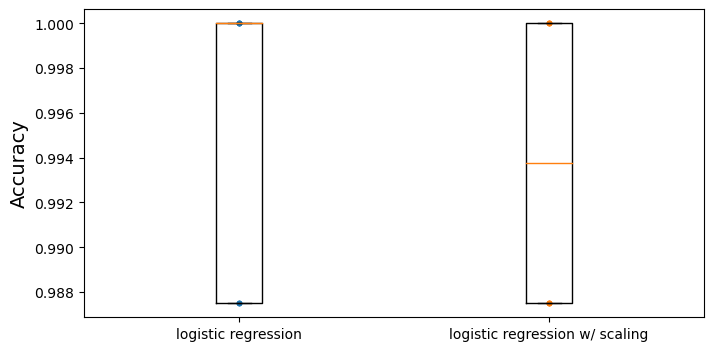

In [18]:
#PLEASE DO NOT CHANGE THIS CELL

plt.figure(figsize=(8, 4))
plt.plot([1]*10, lg_scores, ".")
plt.plot([2]*10, lg_scaled_scores, ".")
plt.boxplot([lg_scores, lg_scaled_scores], labels=("logistic regression","logistic regression w/ scaling"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

# Part B: Naive Bayes [50 marks]

Please note that we are still working with the 'Gene expression cancer RNA-Seq' dataset loaded in Part A.  

### Removing correlated features
Feature independence is an assumption of Naive Bayes. Naive Bayes is particularly sensitive to feature correlations which can lead to overfitting. Based on data alone, we cannot test if features are truly independent, but we can exclude correlated features.
Below, we test if features are correlated.

### _Question 4 [10 marks]_
Drop features with correlation above 0.75.

**Hint:** see what `to_drop` returns, then use it as an argument in the *pandas* `drop()` function with `axis=1` and `inplace=True`.

In [19]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

#######################################################
# TO_DO
#[your code here]


X.drop(to_drop, axis=1, inplace=True)

#/TO_DO
#######################################################

print("Correlated features dropped: ")
print(*to_drop, sep = ", ") 

Correlated features dropped: 
gene_72, gene_92, gene_93, gene_95, gene_145, gene_180, gene_188


### Recursive feature elimination
Lets go further and select the 5 most important features. Recursive Feature Elimination (RFE) is designed to select features by recursively considering smaller and smaller sets of features.  

### _Question 5 [10 marks]_

### _a) [5 marks]_ 
- Use the `RFE()` function in Scikit-learn to select features. (**Hint:** The `MultinomialNB` and `BernoulliNB` models do not have a `coef_` attribute, but the attribute `feature_log_prob_` can serve a similar purpose. Check the Scikit-learn documentation and examples for more information.)

### _b) [5 marks]_ 
- After selecting features to eliminate, use the `support_` attribute as a mask to select the right columns.

              precision    recall  f1-score   support

        BRCA       0.38      1.00      0.55        61
        KIRC       0.00      0.00      0.00        17
        COAD       1.00      0.04      0.08        25
        LUAD       0.00      0.00      0.00        29
        PRAD       0.00      0.00      0.00        29

    accuracy                           0.39       161
   macro avg       0.28      0.21      0.13       161
weighted avg       0.30      0.39      0.22       161



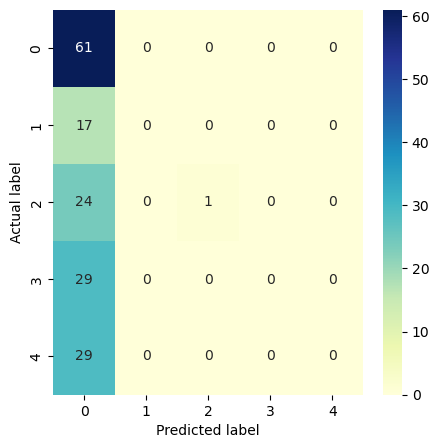

In [20]:
nb = MultinomialNB()

#######################################################
# TO_DO
#[your code here]
selector = RFE(nb, n_features_to_select=5, importance_getter="feature_log_prob_")
selected_features = selector.fit(X,y);
remove = selected_features.support_
keep = ~remove
X.drop(X.columns[keep], axis=1, inplace=True)

#/TO_DO
#######################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    print(classification_report(y_test, nb_predict, target_names = label_list))
    
nb_confusion = confusion_matrix(y_test, nb_predict)
plot_conf_matrix(nb_confusion)

We are now going to switch to a different dataset.
### Zoo dataset 
This is a simple dataset which classifies animals into 7 categories. 

Dataset location: https://archive.ics.uci.edu/ml/datasets/Zoo  

Number of instances: 210

Number of features: 17

Attribute Information:  
1. animal name: Unique for each instance   
2. hair:	Boolean   
3. feathers:	Boolean   
4. eggs:	Boolean   
5. milk:	Boolean   
6. airborne:	Boolean   
7. aquatic:	Boolean   
8. predator:	Boolean   
9. toothed:	Boolean   
10. backbone:	Boolean   
11. breathes:	Boolean   
12. venomous:	Boolean   
13. fins:	Boolean   
14. legs:	Numeric (set of values: {0,2,4,5,6,8})   
15. tail:	Boolean   
16. domestic:	Boolean   
17. catsize:	Boolean   
18. type:	Numeric (integer values in range [1,7])  

All of these parameters are discrete-valued.
  
### Load dataset
Please save the 'zoo.csv' file included in the assignement zip file, which contains a subset of this data, and change the paths below to the paths leading  to the location of your downloaded files. You may want to use `os.chdir` to change directory.

In [21]:
# PLEASE CHANGE THE FILE PATHS AS NEEDED

file_path_data_zoo = "zoo.csv"

In [22]:
#PLEASE DO NOT CHANGE THIS CELL

# read the file with pandas.read_csv
data_zoo = pd.read_csv(file_path_data_zoo)

# because the file does not contain header information, we manually add headers of the dataset
data_zoo.columns = ["animal name", "hair", "feathers","eggs", 
                "milk", "airborne","aquatic", "predator", "toothed", "backbone", 
                    "breathless", "venomous", "fins", "legs", "tail", "domestic", "catsize", "class"]

We assign columns 2 to 18 (everything other than animal name and class) to variable `X_zoo`. Remember that indexing starts at 0.  
We assign the "class" column to variable `y`.  
We then split `X` and `y` into train and test datasets.

In [23]:
#PLEASE DO NOT CHANGE THIS CELL

X_zoo = data_zoo.iloc[:,1:17]
y_zoo = data_zoo["class"]
X_zoo_train, X_zoo_test, y_zoo_train, y_zoo_test = train_test_split(X_zoo, y_zoo, test_size=0.2, random_state=42)

Below, we create a test dataset which contains only animals with 4 or fewer legs. 

In [24]:
#PLEASE DO NOT CHANGE THIS CELL

X_drop_train = X_zoo_train.drop(X_zoo_train[X_zoo_train["legs"]>4].index)
y_drop_train = y_zoo_train.drop(X_zoo_train[X_zoo_train["legs"]>4].index)

We create an instance of a multinomial Naive Bayes classifier. We train `nb` on `X_drop_train`, and test it on `X_zoo_test`.  
You should get a warning message suggesting that the value of alpha is automatically overwritten. (Note that this message is not suppressed.)

In [25]:
#PLEASE DO NOT CHANGE THIS CELL

nb = MultinomialNB(alpha =0)
nb.fit(X_drop_train, y_drop_train)
nb_predict_train = nb.predict(X_drop_train)
nb_predict_test = nb.predict(X_zoo_test)
print(accuracy_score(nb_predict_train, y_drop_train))
print(accuracy_score(nb_predict_test, y_zoo_test))

0.9565217391304348
0.75


/home/grecubogdan/miniconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


### _Question 6 [10 marks]_   
Please comment on what the alpha parameter does.
**Hints:**  
- Think what Naive Bayes does when encountering a discrete feature value of which is absent in the train dataset but which is present in the test dataset. What probability estimate would be associated with it?  
- See: Scikit-learn `MultinomialNB` documentation, in particular the description of the alpha parameter https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html  

In [26]:
### [INSERT YOUR ANSWER HERE]
Alpha is called a smoothing parameter, it is used in order to prevent probabilities of a discrete feature of being 0. This 
    occurs when a certain discrete feature is not present in the training set, but it is present in the test set. If this 
    happens, then the conditional probability of that feature will always be 0, and therefore we will never find a value that 
    belongs to that class.
The value of alpha is added to the count of each feature in order to ensure each feature is considered present at least "alpha" 
    times.

# 

SyntaxError: invalid syntax (3822949223.py, line 2)

We are now going  to repeat the above process using Naive Bayes for features with the Bernoulli distribution (`BernoulliNB()` in scikit-learn). We are particularly interested in interpreting decision boundaries of Bernoulli Naive Bayes.

### _Question 7 [20 marks]_

### _a) [2 marks]_ 
- Use recursive feature elimination (RFE) is to select only 2 features (**Note:** in real life cases, you are likely to use this approach to select multiple rather than just two features. In this case we are asking you to analyse the outcome, and 2 features allows us to visualise the decision boundary more easily.)

### _b) [1 mark]_ 
- After selecting the features to eliminate, use the `support_` attribute as a mask to select the right columns. 

In [27]:
nb = BernoulliNB()

#######################################################
# TO_DO
#[your code here]
#a)
selector = RFE(nb, n_features_to_select=2, importance_getter="feature_log_prob_")
selected_features = selector.fit(X_zoo,y_zoo);
#b)
remove = selected_features.support_
keep = ~remove
X_zoo.drop(X_zoo.columns[keep], axis=1, inplace=True)

#/TO_DO
#######################################################

### _c) [2 marks]_ 
- Split data into train and test sets (set `random_state=42`).

### _d) [1 mark]_ 
- Fit the model.

In [28]:
#######################################################
# TO_DO
#[your code here]
#c)
X_zoo_train, X_zoo_test, y_zoo_train, y_zoo_test = train_test_split(X_zoo,y_zoo,random_state=42);
#d)
nb.fit(X_zoo_train, y_zoo_train)

#/TO_DO
##########################################################

BernoulliNB()

### _e) [2 marks]_ 
- Create a Confusion Matrix using the `plot_conf_matrix()`

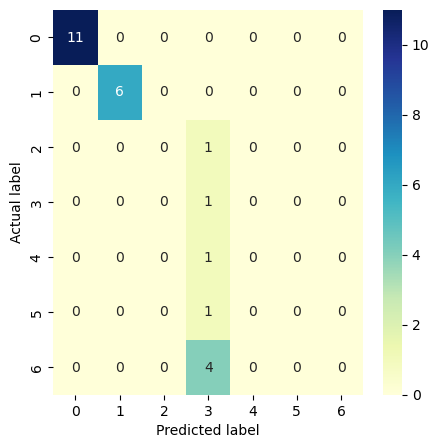

In [29]:
#######################################################
# TO_DO
#[your code here]

y_zoo_calculated = nb.predict(X_zoo_test)
plot_conf_matrix(confusion_matrix(y_zoo_test, y_zoo_calculated))

#/TO_DO
##########################################################

### _f) [2 marks]_ 
- Plot decision boundaries using the `plot_predictions()` function.

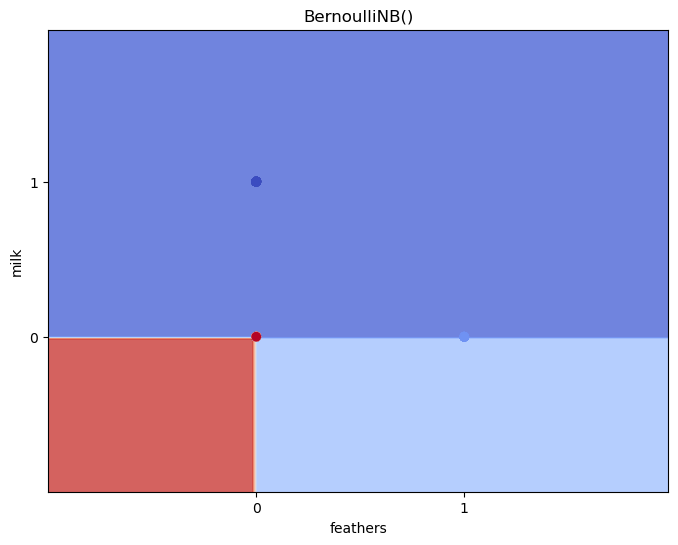

In [30]:
with warnings.catch_warnings():
    
    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")
    
    #[your code here]
    
    plot_predictions(X_zoo, y_zoo, nb)

    #/TO_DO
##########################################################

### _g) [10 marks]_ 
- Interpret the decision boundaries: Recall the shapes of decision boundaries you have seen in classes - were they straight and crossing at right angles? Why is this the case when using `BernoulliNB()`?

In [31]:
### [INSERT YOUR ANSWER HERE]
BernoulliNB assumes the data comes from a Bernoulli distribution. A distribution where each experiment takes a discrete value 
    of 0 or 1. 
The datapoints in our dataset have binary values. We have reduced each entry to two features and therefore each entry can be 
    described as (0,0), (0,1), (1,0), (1,1).
BernoulliNB models the conditional probabilities of each class given the binary features, and the decision boundary is determined 
    by the threshold probability at which one class is favored over the other.
Since the features on both axes only can take binary values, our decision boundaries will be perpendicular to the axis of both features

SyntaxError: invalid syntax (1765087022.py, line 2)